In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"/Users/behrangbidadi/DSGA/09-19-Amazon-Ranking-Analysis.csv")


In [3]:
df.head()
#Ran this to see what the Column names are and begin to understand what they mean
#Based on the prompt, 'CorrectedIndexTrueRank' and 'BBVendor' jump out as potential columns
#that could have an explanatory impact on a y variable like 'CorrectedPrice'
#I also think that 'BBCorrectedPrice' includes the price + shipping charge for orders
#that didn't initially have the shipping charge displayed and
#are 'Filled By Amazon' or FBA' as 'ScrapedIndexVendorType'
#FBA is where  sellers pay Amazon roughly 10-20% of sales "to warehouse and ship their products"

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [4]:
df.shape
#There are 6,973 vendor listing, and 14 columns

(6973, 14)

In [5]:
df.dtypes

Index                       int64
ProductName                object
ScrapeDate                 object
ScrapedIndex                int64
ScrapedIndexTrueRank        int64
CorrectedIndexTrueRank      int64
ScrapedIndexPrice         float64
CorrectedPrice            float64
ScrapedIndexVendor         object
ScrapedIndexVendorType     object
BBScrapedPrice            float64
BBVendorType               object
BBVendor                   object
BBCorrectedPrice          float64
dtype: object

In [6]:
df.isnull().any()
#Only found null values in BBVendor

Index                     False
ProductName               False
ScrapeDate                False
ScrapedIndex              False
ScrapedIndexTrueRank      False
CorrectedIndexTrueRank    False
ScrapedIndexPrice         False
CorrectedPrice            False
ScrapedIndexVendor        False
ScrapedIndexVendorType    False
BBScrapedPrice            False
BBVendorType              False
BBVendor                   True
BBCorrectedPrice          False
dtype: bool

In [7]:
query = df.isnull().any(axis=1)

In [8]:
df[query]
#There are 164 rows with BBVendor = NaN
#That is 2.35% of 6,973 observations
#That's a relatively small number, so I will replace null values with the mode,
#which is the BBVendor that appears the most often

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
19,19,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,1,1,1,40.00,40.00,Irtenzia,Other,-1.0,O,NaN,9.97
20,20,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,2,2,2,54.94,54.94,Mild Shop,Other,-1.0,O,NaN,9.97
1367,1367,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,1,1,1,53.04,53.04,PORTABLE GUY,Other,-1.0,O,NaN,165.50
1368,1368,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,2,2,2,54.41,54.41,TheXBOXking,Other,-1.0,O,NaN,165.50
1369,1369,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,3,3,3,54.69,54.69,WebyShops,Other,-1.0,O,NaN,165.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,5658,"Regalo Swing Down Bedrail, White",2016-06-27,20,19,19,44.96,44.96,Mild Shop,Other,-1.0,O,NaN,35.34
5659,5659,"Regalo Swing Down Bedrail, White",2016-06-27,21,20,20,47.79,47.79,MidwestProductsDepot,Other,-1.0,O,NaN,35.34
5660,5660,"Regalo Swing Down Bedrail, White",2016-06-27,22,21,21,47.90,47.90,Fairy Bless,Other,-1.0,O,NaN,35.34
5661,5661,"Regalo Swing Down Bedrail, White",2016-06-27,23,22,22,53.96,53.96,RevoSync,Other,-1.0,O,NaN,35.34


In [9]:
df['BBVendor'].mode()
#Amazon.com is the vendor that appears most often

0    Ships from and sold by Amazon.com.
dtype: object

In [10]:
df['BBVendor'].fillna('Ships from and sold by Amazon.com.', inplace=True)
#I am filling null values in BBVendor with the mode

In [11]:
df.isnull().any()
#This is my check to make sure no more null values left

Index                     False
ProductName               False
ScrapeDate                False
ScrapedIndex              False
ScrapedIndexTrueRank      False
CorrectedIndexTrueRank    False
ScrapedIndexPrice         False
CorrectedPrice            False
ScrapedIndexVendor        False
ScrapedIndexVendorType    False
BBScrapedPrice            False
BBVendorType              False
BBVendor                  False
BBCorrectedPrice          False
dtype: bool

In [12]:
np.unique(df['BBVendorType'])
#There are only 3 BBVendorTypes

array(['Amazon', 'FBA', 'O'], dtype=object)

In [13]:
df['BBVendorType'].value_counts()
#Most of the BBVendorTypes are Amazon

Amazon    5788
O          715
FBA        470
Name: BBVendorType, dtype: int64

In [14]:
np.unique(df['CorrectedIndexTrueRank'])
#I was curious how many ranks there are
#maybe some products are unranked, why 107 rankings but 250 products (confirmed below)?

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107])

In [15]:
products = np.unique(df['ProductName']).tolist()

In [16]:
products[:5]
#Just wanted to see a sample of the products

['#1 BEST Probiotic Supplement - 60 Day Supply with 100% Moneyback Guarantee - Improve Digestion, Bowel Regularity, & Increase Energy with the Most Potent Probiotic...',
 '10 Panel Dip Drug Testing Kit, Test for 10 Different Drugs. (1)',
 '2wayz FULL METAL BODY Garden Hose Splitter | Y Ball Valve Connector for Your Soaker Hose, outdoor faucet, sprinkler & drip irrigation systems. Includes: 10 Rubber Washers + 3 Years Guarantee. Enjoy!',
 '3 Pair Motorcycle Riding Glasses Smoke Clear Yellow',
 '3/4 gal Talstar Pro / One Multi Use Pest Control Insecticide (96 ounce jug)']

In [17]:
len(products)
#this confirms there are 250 products

250

In [18]:
np.unique(df['BBCorrectedPrice'])
#Curious if there are any 0 prices 

array([  0.  ,   2.5 ,   2.57,   5.  ,   5.09,   5.47,   6.79,   6.85,
         7.69,   8.17,   8.99,   9.68,   9.95,   9.97,  10.04,  10.07,
        10.16,  10.49,  10.54,  10.66,  11.  ,  11.28,  11.5 ,  11.92,
        11.93,  12.16,  12.36,  12.77,  12.78,  12.82,  12.99,  13.21,
        13.39,  13.49,  13.56,  13.59,  13.64,  13.96,  13.99,  14.06,
        14.07,  14.09,  14.16,  14.22,  14.31,  14.39,  14.44,  14.66,
        14.67,  14.8 ,  14.82,  15.27,  15.48,  15.49,  15.56,  15.78,
        15.79,  15.93,  16.31,  16.43,  16.52,  16.67,  16.72,  16.9 ,
        16.92,  17.05,  17.24,  17.45,  17.51,  17.59,  18.02,  18.19,
        18.24,  18.29,  18.42,  18.47,  18.5 ,  18.63,  18.66,  18.78,
        19.08,  19.1 ,  19.28,  19.29,  19.33,  19.43,  19.81,  19.86,
        19.93,  19.99,  20.05,  20.43,  20.8 ,  20.91,  21.11,  21.33,
        21.57,  21.9 ,  22.41,  22.57,  22.62,  22.9 ,  22.94,  23.05,
        23.27,  23.34,  23.67,  23.98,  24.1 ,  24.22,  24.46,  24.54,
      

In [18]:
df.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


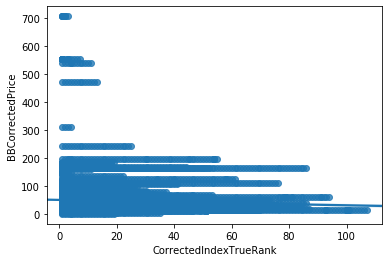

In [32]:
sns.regplot(x='CorrectedIndexTrueRank', y='BBCorrectedPrice', data=df);

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

X = df[['ScrapedIndexTrueRank']]
y = df['BBCorrectedPrice']

#I had to choose a random forest for this because I kept getting errors doing regression due to
#problems with strings converting to floats

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
#I don't think I was abvle to use the training set

In [70]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
rf.predict(X)

array([76.1751656 , 68.07018936, 68.07018936, ..., 45.12910779,
       42.5765965 , 40.21575394])

In [72]:
rf.score(X, y)
#This shows that the Rank has almost no explanatory power on price
#This could show that Amazon's rank is not related to pricing at all and there are other
#ways they determine their rankings, which could mislead consumer
#Or I did something very incorrectly as my model's predictive value is near zero

0.019436586570924508

In [73]:
from sklearn.pipeline import make_pipeline

In [74]:
rf_pipe = make_pipeline(rf)

In [80]:
rf_pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [81]:
import pickle

with open('pipe.pkl', 'wb') as pipe:
    pickle.dump(rf_pipe, pipe)